In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import textwrap

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Atom87Rb, Cavity, CavityBiref, LaserCoupling, CavityCoupling

# Section 2 - 4-level atom with birefringent cavity

### 2.1 Degenerate polarisation modes (i.e. 1.1 revisited)

A sensible sanity check is that we get the same results as we did in section 1 (specifically 1.1) when our 'birefringent' cavity has no polarisation mode splitting ($\Delta_P=0$) and equal decay rates of orthogonal polarisations from the cavity ($\kappa_1 = \kappa_2$).

**Note**

When using a birefringent cavity, the photon number in each polarisation eigenmode needs to be considered independently.  This means our states now take the form
	|atom_state, $n_X$, $n_Y$>
where $n_X$ / $n_Y$ are the photon number in each polarisation eigenmode of the cavity.  This means we set up and we simulate our system in the so-called 'cavity basis'.  This basis is chosen as there is no direct coupling between the cavity eigenmodes, simplifying the Hamiltonians compared to any other (equally valid) choice of polarisation basis.

With no cavity decay or spontaneous emission.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_0_97999.pyx.  Generated in 4.4 seconds.
Running simulation with 501 timesteps...finished in 0.114 seconds


Photon emission: 0.0
Photon emission in |X>, |Y>: 0.0 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x11bd82748>,
 <matplotlib.figure.Figure at 0x11c08b860>)

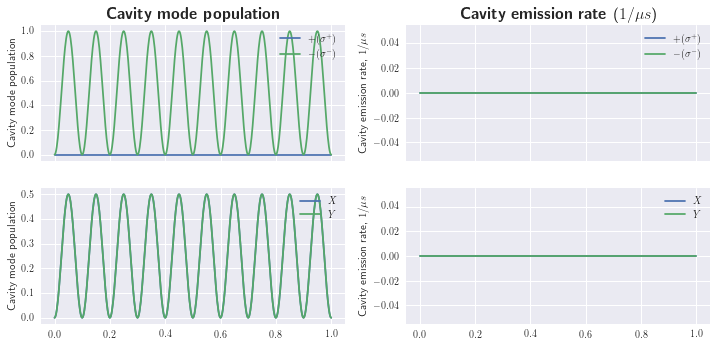

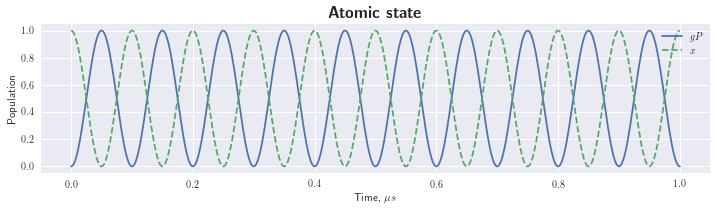

In [2]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.0 * 2.*np.pi,
                  kappa2 = 0.0 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP','x'])

Damped vacuum Rabi oscillations.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_96311.pyx.  Generated in 3.939 seconds.
Running simulation with 501 timesteps...finished in 0.13 seconds


Photon emission: 0.494
Photon emission in |X>, |Y>: 0.247 0.247
Spontaneous emission: 0.504


(<matplotlib.figure.Figure at 0x117db1278>,
 <matplotlib.figure.Figure at 0x11a7aba90>)

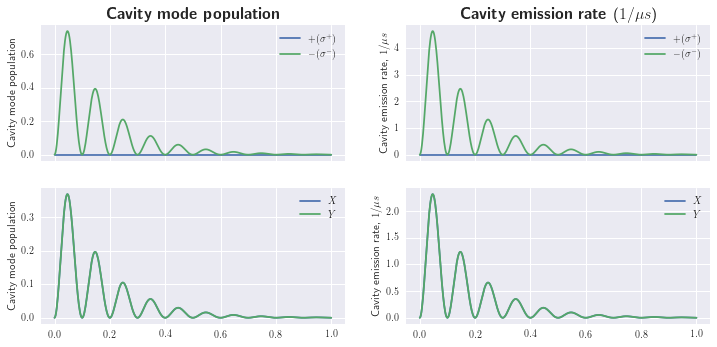

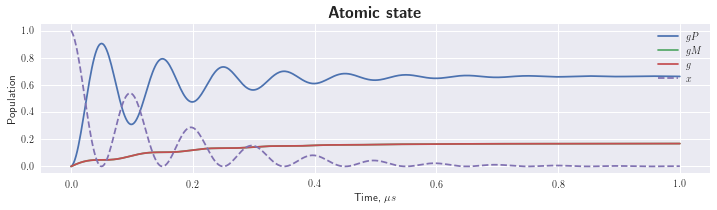

In [3]:
atom4lvl = Atom4lvl(gamma=0.5* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Feel free to similarly repeat any of the simualtions from Section 1 with using the CavityBiref object with $\kappa_1 = \kappa_2$ and $\Delta_P=0$.

### 2.2 Photon polarisation in birefringent cavities

The orientation of the 'cavity basis', i.e. the polarisation eigenmode (${|X>,|Y>}$), is expressed in terms of the linearly polarised 'lab basis' (${|H>,|V>}$).  To set this we pass the CavityBiref obeject the rotation matrix $R_{CL}$ that maps ${|X>,|Y>} \rightarrow {|H>,|V>}$

We will consider a cavity with linear polarisation eigenmodes (${|X>=|H>,|Y>=|V>}$) -- *note: this is also the default assumption of CavityBiref* -- thus $R_{CL}$is simply the identity matrix.  Theenergy splitting of these polarisation eigenmodes is given by $\Delta_P$.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_2_97999.pyx.  Generated in 3.75 seconds.
Running simulation with 501 timesteps...finished in 0.072 seconds


Photon emission: 0.998
Photon emission in |X>, |Y>: 0.998 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x11c34cfd0>,
 <matplotlib.figure.Figure at 0x11c2aa470>)

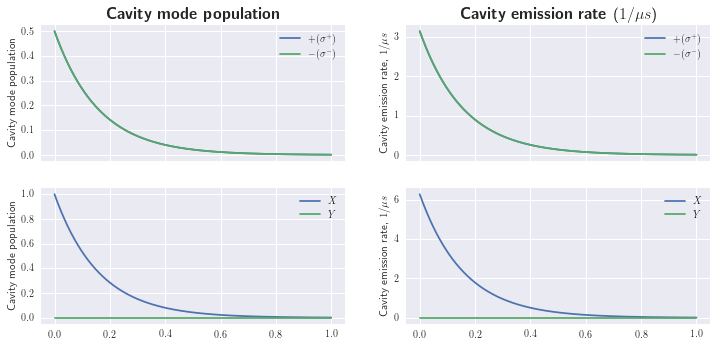

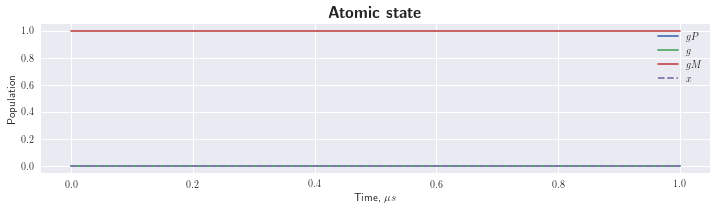

In [4]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',1, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

In [17]:
from qutip import *

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

### 2.3 Polarisation dependent mirror decays

### 2.4 v-Stirap in birefringent cavities